In [65]:
import pandas as pd
df = pd.read_csv("data/val_dataset.csv")
NUM_VAL_SAMPLE = df.shape[0]
print(NUM_VAL_SAMPLE)

419


# Evaluating Performance

In [66]:
import pandas as pd
import numpy as np
import ast

In [67]:
eval_file = "results/eval_finetuned_llama_instruct_aug.jsonl"
#eval_file = "results/eval_finetuned_llama_8b_aug.jsonl"
#eval_file = "results/eval_finetuned_llama_instruct_aug_cluster6.jsonl"
#eval_file = "results/eval_finetuned_llama_8b_aug_cluster6.jsonl"

eval_df = pd.read_json(eval_file, lines=True)
eval_df.replace("", pd.NA, inplace=True)
eval_df = eval_df.dropna(subset=['attempt1', 'attempt2'], how='all').reset_index(drop=True)

In [68]:
eval_df.head()

,id,input_prompt,output,attempt1,attempt2
0,00576224,"Below is an instruction that describes a task,...","[[3, 2, 3, 2, 3, 2],\n [7, 8, 7, 8, 7, 8],\n [...","[[3, 2, 3, 2, 3, 2],\n [7, 8, 7, 8, 7, 8],\n ...","[[3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2],\n [7, ..."
1,009d5c81,"Below is an instruction that describes a task,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n...","\n[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","\n[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
2,00dbd492,"Below is an instruction that describes a task,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,...","\n[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...","([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2..."
3,03560426,"Below is an instruction that describes a task,...","[[7, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [7, 0, 0, 0...","\n[[7, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [7, 0, 0...","\n[[7, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [7, 0, 0..."
4,05a7bcf2,"Below is an instruction that describes a task,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0...","([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0..."


In [69]:
eval_df.shape

(419, 5)

In [70]:
correct = 0
error = 0
per_pixel_overlap = []
for i, row in eval_df.iterrows():
    output = np.array(ast.literal_eval(row["output"]))
    attempt1_correct = False
    attempt1_overlap = 0
    attempt1_error = False

    attempt2_correct = False
    attempt2_overlap = 0
    attempt2_error = False

    # Attempt 1
    try:
        attempt1 = np.array(ast.literal_eval(row["attempt1"]))
        attempt1_correct = np.array_equal(attempt1, output)
        attempt1_overlap = np.sum(attempt1 == output) / output.size
    except Exception as e: 
        attempt1_error = True
        row_id = row['id']
        print(f"{row_id} attempt1 {e}")
        print(row["attempt1"])

    # Attempt 2
    try:
        attempt2 = np.array(ast.literal_eval(row["attempt2"]))
        attempt2_correct = np.array_equal(attempt2, output)
        attempt2_overlap = np.sum(attempt2 == output) / output.size
    except Exception as e: 
        attempt2_error = True
        row_id = row['id']
        print(f"{row_id} attempt2 error {e}")
        print(row["attempt2"])

    if attempt1_correct or attempt2_correct:
        correct += 1
    if attempt1_overlap > attempt2_overlap:
        per_pixel_overlap.append(attempt1_overlap)
    else:
        per_pixel_overlap.append(attempt2_overlap)

    if (attempt1_error or attempt2_error) and not (attempt1_correct or attempt2_correct):
        error += 1

00576224 attempt1 invalid syntax (<unknown>, line 6)
 [[3, 2, 3, 2, 3, 2],
 [7, 8, 7, 8, 7, 8],
 [2, 3, 2, 3, 2, 3],
 [8, 7, 8, 7, 8, 7],
 [3, 2, 3, 2, 3, 2],
 [7, 8, 7, 8, 7, 8]]<|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_text|><|end_of_te

In [71]:
num_samples = eval_df.shape[0]
accuracy = correct / num_samples
total_acc = correct / NUM_VAL_SAMPLE
mean_pixel_overlap = np.mean(per_pixel_overlap)
error_rate = error / num_samples

print("Evaluation set:")
print(f"num of total eval sample in original dataset: {NUM_VAL_SAMPLE}")
print(f"num of inferred samples: {num_samples}")
print(f"correct: {correct}")
print(f"error: {error}")
print(f"accuracy (correct / num of inferred sample): {accuracy}")
print(f"accuracy (correct / num of total eval sample): {total_acc}")
print(f"mean pixel overlap: {mean_pixel_overlap}")
print(f"parsing error rate: {error_rate}")

Evaluation set:
num of total eval sample in original dataset: 419
num of inferred samples: 419
correct: 21
error: 248
accuracy (correct / num of inferred sample): 0.050119331742243436
accuracy (correct / num of total eval sample): 0.050119331742243436
mean pixel overlap: 0.486806937939625
parsing error rate: 0.5918854415274463


# Evaluating Performance with String Manipulation

In [72]:
correct = 0
error = 0
per_pixel_overlap = []
for i, row in eval_df.iterrows():
    output = np.array(ast.literal_eval(row["output"]))
    attempt1_correct = False
    attempt1_overlap = 0
    attempt1_error = False

    attempt2_correct = False
    attempt2_overlap = 0
    attempt2_error = False

    # Attempt 1
    try:
        attempt1 = row['attempt1'].strip().split('<|end_of_text|>')[0]
        attempt1 = np.array(ast.literal_eval(attempt1))
        attempt1_correct = np.array_equal(attempt1, output)
        attempt1_overlap = np.sum(attempt1 == output) / output.size
    except Exception as e: 
        attempt1_error = True
        row_id = row['id']
        print(f"{row_id} attempt1 {e}")
        print(row["attempt1"])

    # Attempt 2
    try:
        attempt2 = row['attempt2'].strip().split('<|end_of_text|>')[0]
        attempt2 = np.array(ast.literal_eval(attempt2))
        attempt2_correct = np.array_equal(attempt2, output)
        attempt2_overlap = np.sum(attempt2 == output) / output.size
    except Exception as e: 
        attempt2_error = True
        row_id = row['id']
        print(f"{row_id} attempt2 error {e}")
        print(row["attempt2"])

    if attempt1_correct or attempt2_correct:
        correct += 1
    if attempt1_overlap > attempt2_overlap:
        per_pixel_overlap.append(attempt1_overlap)
    else:
        per_pixel_overlap.append(attempt2_overlap)

    if (attempt1_error or attempt2_error) and not (attempt1_correct or attempt2_correct):
        error += 1

00576224 attempt2 error '[' was never closed (<unknown>, line 5)
 [[3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2],
 [7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8],
 [2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3],
 [8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7],
 [3, 2, 3, 2, 3, 2, 3,
00dbd492 attempt2 error '(' was never closed (<unknown>, line 1)
([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 8, 8, 8, 2, 0, 0, 0, 0],
 [0, 2, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 8, 2, 8, 2, 0, 0, 0, 0],
 [0, 2, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 8, 8, 8, 2, 0, 0, 0, 0],
 [0, 2, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0],
 [0, 2, 4, 4, 4, 2, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0],
 [0, 2, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 2, 8, 8, 8, 2, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 8, 2, 8, 2, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 8, 8, 2, 0, 

In [73]:
num_samples = eval_df.shape[0]
accuracy = correct / num_samples
total_acc = correct / NUM_VAL_SAMPLE
mean_pixel_overlap = np.mean(per_pixel_overlap)
error_rate = error / num_samples

print("Evaluation set:")
print(f"num of total eval sample in original dataset: {NUM_VAL_SAMPLE}")
print(f"num of inferred samples: {num_samples}")
print(f"correct: {correct}")
print(f"error: {error}")
print(f"accuracy (correct / num of inferred sample): {accuracy}")
print(f"accuracy (correct / num of total eval sample): {total_acc}")
print(f"mean pixel overlap: {mean_pixel_overlap}")
print(f"parsing error rate: {error_rate}")

Evaluation set:
num of total eval sample in original dataset: 419
num of inferred samples: 419
correct: 24
error: 196
accuracy (correct / num of inferred sample): 0.057279236276849645
accuracy (correct / num of total eval sample): 0.057279236276849645
mean pixel overlap: 0.5644203493346857
parsing error rate: 0.4677804295942721


# Obtaining Loss vs Steps Graph

In [76]:
import json

losses = []

with open('results/llama_3b_aug_losses.jsonl', 'r') as file:
    for line in file:
        # Remove leading/trailing whitespace, replace single quotes with double quotes
        corrected_line = line.strip().replace("'", '"')
        
        try:
            # Parse the corrected line as JSON
            loss_data = json.loads(corrected_line)
            # Append the 'loss' value to the losses list
            losses.append(loss_data['loss'])
        except json.JSONDecodeError as e:
            # Handle any lines that fail to parse correctly
            print(f"Skipping malformed line: {line}. Error: {e}")

# Print the extracted losses
print(len(losses))


552


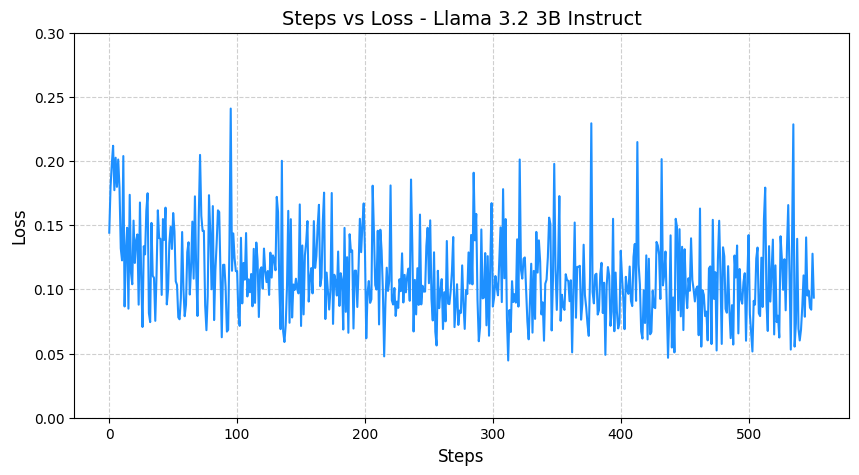

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for plotting (replace with your 'losses' data

plt.figure(figsize=(10,5))

# Plotting the data with an improved line style
plt.plot(losses, color='dodgerblue', linewidth=1.5)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.ylim(0,0.3)

# Adding labels to axes and a title
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Steps vs Loss - Llama 3.2 3B Instruct', fontsize=14)


# Show the plot
plt.show()


In [78]:
import json

losses = []

with open('results/llama_8b_aug_losses.jsonl', 'r') as file:
    for line in file:
        # Remove leading/trailing whitespace, replace single quotes with double quotes
        corrected_line = line.strip().replace("'", '"')
        
        try:
            # Parse the corrected line as JSON
            loss_data = json.loads(corrected_line)
            # Append the 'loss' value to the losses list
            losses.append(loss_data['loss'])
        except json.JSONDecodeError as e:
            # Handle any lines that fail to parse correctly
            print(f"Skipping malformed line: {line}. Error: {e}")

# Print the extracted losses
print(len(losses))

552


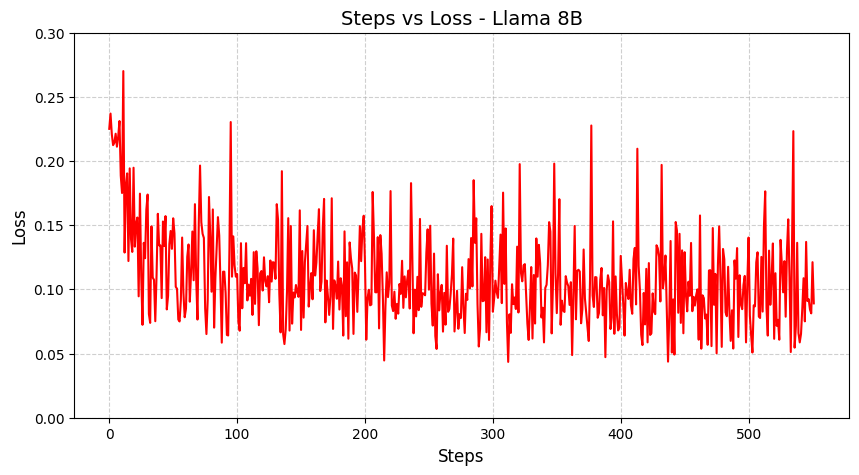

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for plotting (replace with your 'losses' data

plt.figure(figsize=(10,5))

# Plotting the data with an improved line style
plt.plot(losses, color='red', linewidth=1.5)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.ylim(0,0.3)

# Adding labels to axes and a title
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Steps vs Loss - Llama 8B', fontsize=14)


# Show the plot
plt.show()